# Project 

## BDA 104: Predictive Modelling & Data Mining

## Due Date: July 25, 2020 

## Author: Marek Brzozowski

## Theme: Fraudulent Credit Card Prediction

In [1]:
# Importing Libraries and Packages
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
import time

from sklearn.decomposition import PCA, TruncatedSVD

# Classifiers
from sklearn import tree
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Other Libraries
from sklearn.datasets import make_classification
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, log_loss,r2_score, confusion_matrix, silhouette_score, silhouette_samples
from sklearn.feature_selection import RFE

In [2]:
# Variables
split = 0.2
random = 31

classifiers = {
    "Logistic Regression": LogisticRegression(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "KNearest": KNeighborsClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVC": SVC()
}

In [3]:
# Importing Dataset
raw = pd.read_csv('creditcard.csv')
raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
print('Total Nulls: ',raw.isnull().sum().sum())
print('Number of Rows and Columns: ',raw.shape)

Total Nulls:  0
Number of Rows and Columns:  (284807, 31)


In [6]:
print('Column Types:\n',raw.dtypes)

Column Types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [7]:
duplicates = raw[raw.duplicated()]
print('Number of rows that are duplicates: ',len(duplicates))

Number of rows that are duplicates:  1081


In [8]:
data = raw.copy()
data = data.drop(duplicates.index)

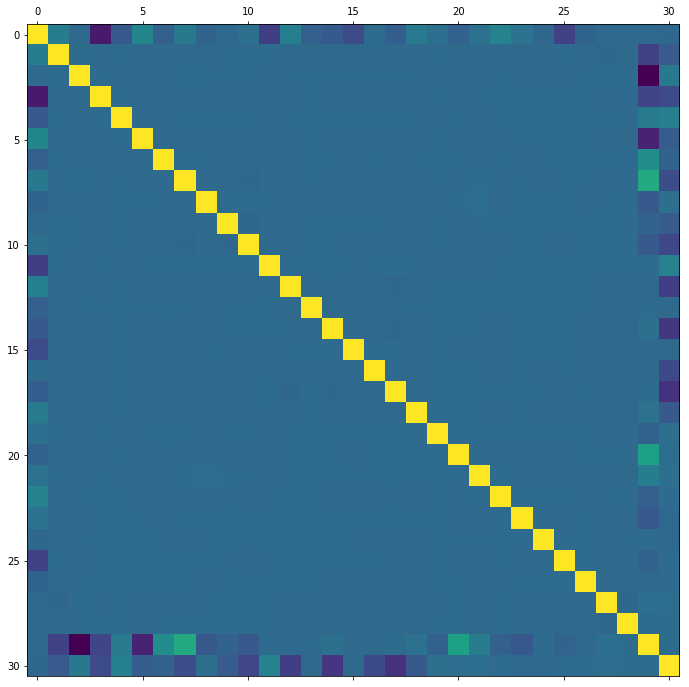

In [9]:
def plot_corr(df,size=12):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe. '''
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    
plot_corr(data)

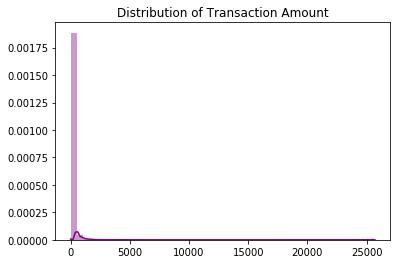

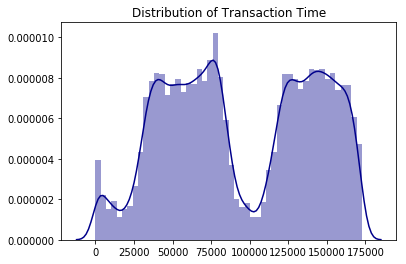

In [10]:
sns.distplot(data['Amount'].values,color ='purple')
plt.title('Distribution of Transaction Amount')
plt.show()
sns.distplot(data['Time'].values,color='darkblue')
plt.title('Distribution of Transaction Time')
plt.show()

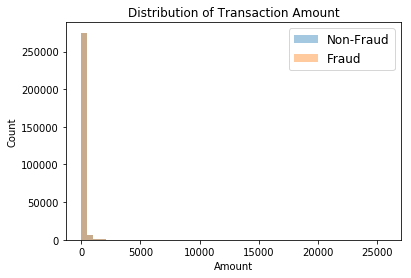

In [11]:

df = data[data['Class'] == 0]
sns.distplot(data['Amount'].values,  kde=False, label='Non-Fraud')

df =data[data['Class'] == 1]
sns.distplot(data['Amount'].values,  kde=False,label='Fraud')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.show()

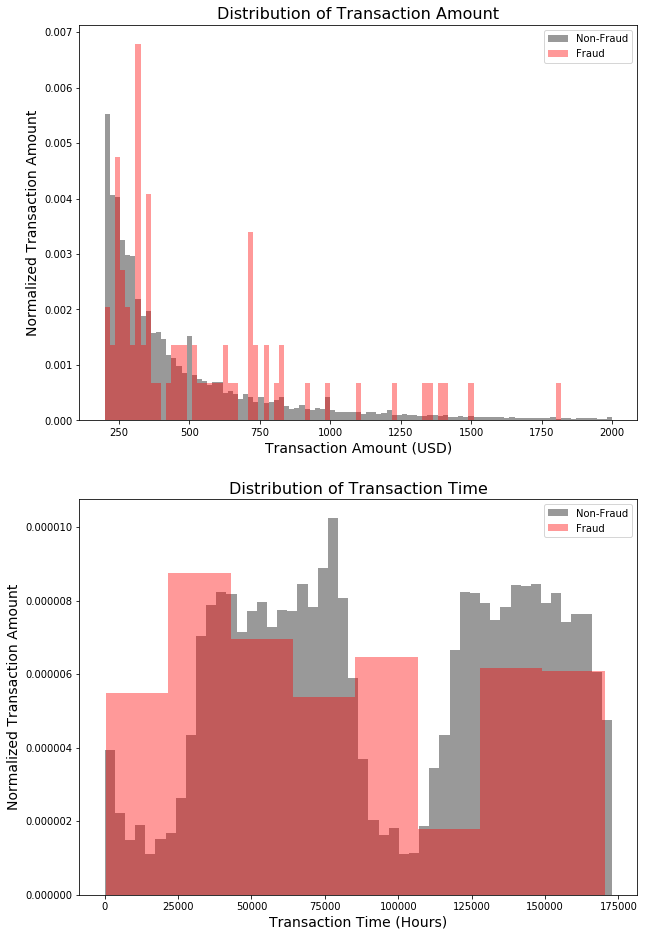

In [12]:
# Better way of writing: Determine Distribution For Outliers and Skewness
fig, ax = plt.subplots(2,1, figsize =(10,16))

bins = np.linspace(200, 2000, 100)
# sns.distplot(data['Amount'].values, ax=ax[0],color ='purple')
df = data[data['Class'] == 0]
sns.distplot(df['Amount'].values,bins,norm_hist=True, ax=ax[0],  kde=False, label='Non-Fraud', color= 'black')
df =data[data['Class'] == 1]
sns.distplot(df['Amount'].values,bins,norm_hist=True, ax=ax[0], kde=False,label='Fraud', color = 'red')

df = data[data['Class'] == 0]
sns.distplot(df['Time'].values,norm_hist=True, ax=ax[1],  kde=False, label='Non-Fraud', color= 'black')
df =data[data['Class'] == 1]
sns.distplot(df['Time'].values,norm_hist=True, ax=ax[1], kde=False,label='Fraud', color = 'red')

ax[0].set_title('Distribution of Transaction Amount',fontsize=16)
ax[0].set_xlabel('Transaction Amount (USD)',fontsize=14)
ax[0].set_ylabel('Normalized Transaction Amount',fontsize=14)
ax[0].legend(loc='upper right')
ax[1].set_title('Distribution of Transaction Time',fontsize=16)
ax[1].set_xlabel('Transaction Time (Hours)',fontsize=14)
ax[1].set_ylabel('Normalized Transaction Amount',fontsize=14)
ax[1].legend(loc='upper right')


# Maybe consider scalling the two unscalable columns. Online examples are using RobustScaler()

Distribution of the Classes in the subsample dataset
0    0.509845
1    0.490155
Name: Class, dtype: float64


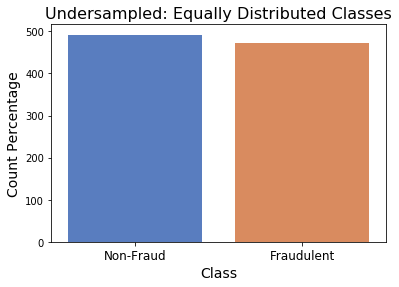

In [13]:
# Method to undersample
data_under = data.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_data = data_under.loc[data['Class'] == 1]
non_fraud_data = data_under.loc[data['Class'] == 0][:492]#[:492]

normal_distributed_data = pd.concat([fraud_data, non_fraud_data])

# Shuffle dataframe rows
new_data = normal_distributed_data.sample(frac=1, random_state=42)


print('Distribution of the Classes in the subsample dataset')
print(new_data['Class'].value_counts()/len(new_data))


sns.countplot('Class', data=new_data, palette='muted')
plt.title('Undersampled: Equally Distributed Classes', fontsize=16)
plt.xticks([0,1],['Non-Fraud','Fraudulent'],fontsize=12)
plt.xlabel('Class',fontsize=14)
plt.ylabel('Count Percentage',fontsize=14)

plt.show()

In [14]:
new_data['Amount']=RobustScaler().fit_transform(new_data['Amount'].values.reshape(-1,1))
new_data['Time']=RobustScaler().fit_transform(new_data['Time'].values.reshape(-1,1))

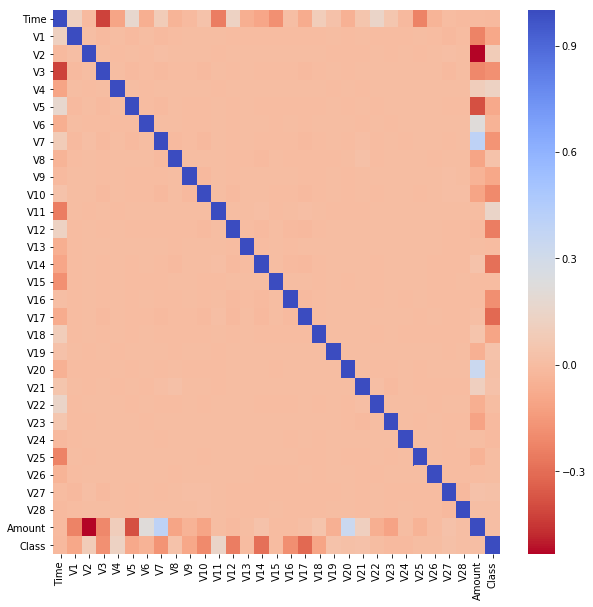

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
sub_sample_corr = data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})

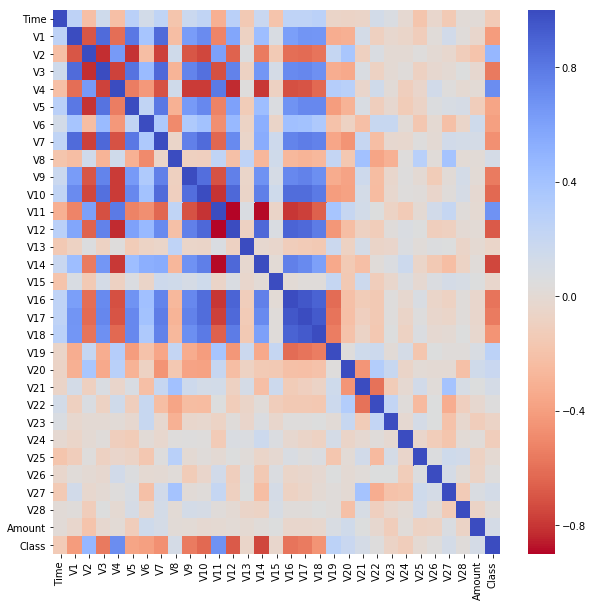

In [16]:
sub_sample_corr = new_data.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20})
# ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

In [17]:
feature = new_data.copy()
target = feature.iloc[:,-1]
features = feature.drop(columns=['Class'],axis=1)


In [18]:
print(
    'The Actual Number of Fraudulent Claims: %0.0f ' 
    '\tTotal Transaction %0.0f '
    '\tPercentage of Fraud Claims %0.2f%%' 
    % (
        target.sum(),
        len(target),
        target.sum()/len(target)*100
        )
    )

The Actual Number of Fraudulent Claims: 473 	Total Transaction 965 	Percentage of Fraud Claims 49.02%


Text(0.5, 1.0, 'Class Distribution')

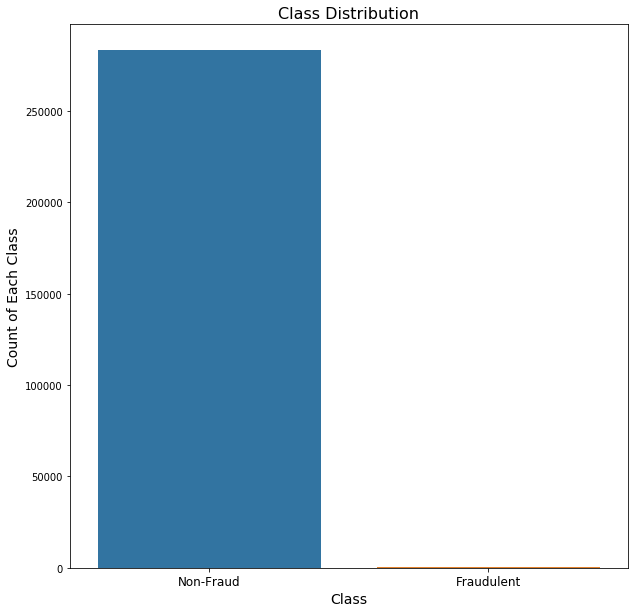

In [19]:
# Plot of class distribution
sns.countplot(data['Class'])
plt.xticks([0,1],['Non-Fraud','Fraudulent'],fontsize=12)
plt.ylabel('Count of Each Class',fontsize=14)
plt.xlabel('Class',fontsize=14)
plt.title('Class Distribution', fontsize=16)

In [20]:
feature_train, feature_test , target_train, target_test = train_test_split(features,target, test_size = split, random_state = random)

Heavy Onesidness need to use different accuracy measures.

In [21]:
def linear_regression(predict_train, predict_test, target_train, target_test):

    linear_model = LinearRegression()

    linear_regression = linear_model.fit(predict_train,target_train)
    print("Linear Regression Training Score: ",linear_regression.score(predict_train,target_train))
    print("Linear Regression Testing Score: ",linear_regression.score(predict_test,target_test))


    predicted_test = linear_regression.predict(predict_test)

    print('\nLinear Regression Testing Score (R^2 Score): ',r2_score(predicted_test,target_test),'\n')

    best_estimator = RFE(linear_model, n_features_to_select= 150)
    best_estimator.fit(predict_train,target_train)
    print('\nLinear RFE Train score: ', best_estimator.score(predict_train,target_train))
    print('Linear RFE Test score: ', best_estimator.score(predict_test,target_test))

    


In [22]:
def logistic_regression(predict_train, predict_test, target_train, target_test):
    
    log_model = LogisticRegression()

    logistic_regression = log_model.fit(predict_train,target_train)
    print("\nLogistic Regression Training Score: ",logistic_regression.score(predict_train,target_train))
    print("Logistic Regression Testing Score: ",logistic_regression.score(predict_test,target_test))

    predicted_test = logistic_regression.predict(predict_test)

    print('\nLogistic Regression Testing Score (R^2 Score): ',r2_score(predicted_test,target_test),'\n')

    best_estimator = RFE(log_model, n_features_to_select= 150)
    best_estimator.fit(predict_train,target_train)
    print('\nLogistic RFE Train score: ', best_estimator.score(predict_train,target_train))
    print('Logistic RFE Test score: ', best_estimator.score(predict_test,target_test))

    print('Logistic Regression (ROC): ', roc_auc_score(target_test, predicted_test))


In [23]:
def decision_tree(predict_train, predict_test, target_train, target_test):

    clf = tree.DecisionTreeClassifier()
    parameters = {'max_features': ['log2', 'sqrt'], 
                        'criterion': ['entropy', 'gini'],
                        'max_depth': [2, 3, 5, 10], 
                        'min_samples_leaf': [1,5,8]
                }

    grid_obj = GridSearchCV(clf, parameters, cv=5)
    grid_obj = grid_obj.fit(predict_train,target_train)
    clf = grid_obj.best_estimator_
    clf.fit(predict_train,target_train)

    print('Decision Tree Accuracy score for Training: ',clf.score(predict_train,target_train))

    predicted_test = clf.predict(predict_test)
    
    print("\nDecision Tree Accuracy Score for Testing: ",accuracy_score(predicted_test,target_test))

    print('Decision Tree Classifier (ROC): ', roc_auc_score(predicted_test,target_test))

    cm = confusion_matrix(predicted_test,target_test)
    sns.heatmap(cm, annot=True)
    plt.show()

In [24]:
def knn(predict_train, predict_test, target_train, target_test):   # feature_train, feature_test, target_train, target_test
    neighbours = KNeighborsClassifier(n_neighbors =3)
    neighbours.fit(predict_train,target_train)

    print('\nKNN Accuracy Train score: ', neighbours.score(predict_train,target_train))
    print('KNN Accuracy Test score: ', neighbours.score(predict_test,target_test))  


In [25]:
def random_forest(predict_train, predict_test, target_train, target_test):

    clf = RandomForestClassifier()
    parameters = {'max_features': ['log2', 'sqrt'], 
                        'criterion': ['entropy', 'gini'],
                        'max_depth': [2, 3, 5, 10], 
                        'min_samples_leaf': [1,5,8]
                }

    grid_obj = GridSearchCV(clf, parameters, cv=5)
    grid_obj = grid_obj.fit(predict_train,target_train)
    clf = grid_obj.best_estimator_
    clf.fit(predict_train,target_train)

    print('Random Forest Accuracy score for Training: ',clf.score(predict_train,target_train))

    predicted_test = clf.predict(predict_test)
    
    print("\nRandom Forest Accuracy Score for Testing: ",accuracy_score(predicted_test,target_test))

    print('Random Forest Classifier (ROC): ', roc_auc_score(predicted_test,target_test))

    cm = confusion_matrix(predicted_test,target_test)
    sns.heatmap(cm, annot=True)
    plt.show()


In [26]:
def svc(predict_train, predict_test, target_train, target_test):

    svc = SVC()
    svc.fit(predict_train,target_train)

    print('Random Forest Accuracy score for Training: ', svc.score(predict_train,target_train))

    predicted_test = svc.predict(predict_test)
    
    print("\nRandom Forest Accuracy Score for Testing: ",accuracy_score(predicted_test,target_test))

    print('Random Forest Classifier (ROC): ', roc_auc_score(predicted_test,target_test))

In [27]:
linear_regression(feature_train, feature_test, target_train, target_test)

Linear Regression Training Score:  0.6587932046717726
Linear Regression Testing Score:  0.4389435027509754

Linear Regression Testing Score (R^2 Score):  0.2684687111303109 


Linear RFE Train score:  0.6587932046717726
Linear RFE Test score:  0.4389435027509754


In [28]:
logistic_regression(feature_train, feature_test, target_train, target_test)


Logistic Regression Training Score:  0.9546632124352331
Logistic Regression Testing Score:  0.9326424870466321

Logistic Regression Testing Score (R^2 Score):  0.7302150537634409 


Logistic RFE Train score:  0.9546632124352331
Logistic RFE Test score:  0.9326424870466321
Logistic Regression (ROC):  0.9344155844155844


Decision Tree Accuracy score for Training:  0.9365284974093264

Decision Tree Accuracy Score for Testing:  0.8963730569948186
Decision Tree Classifier (ROC):  0.9046302320537845
C:\Users\Marek\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


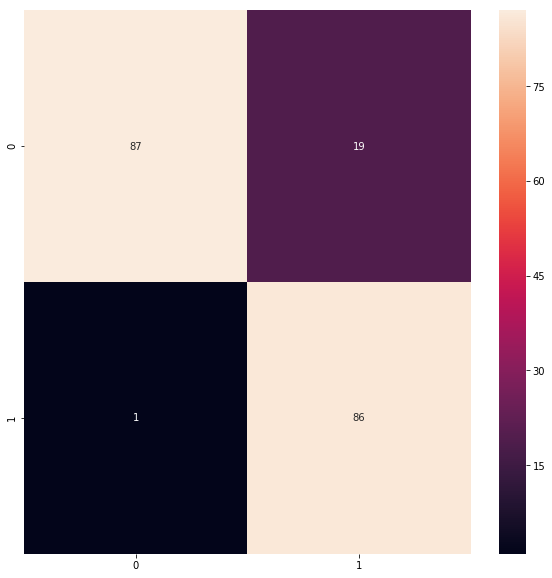

In [29]:
decision_tree(feature_train, feature_test, target_train, target_test)

Random Forest Accuracy score for Training:  0.9572538860103627

Random Forest Accuracy Score for Testing:  0.9067357512953368
Random Forest Classifier (ROC):  0.9075187969924812


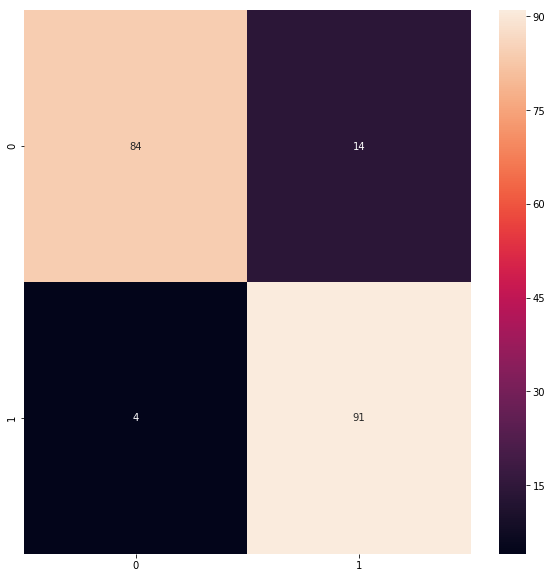

In [30]:
random_forest(feature_train, feature_test, target_train, target_test)

In [31]:
svc(feature_train, feature_test, target_train, target_test)

Random Forest Accuracy score for Training:  0.9624352331606217

Random Forest Accuracy Score for Testing:  0.9222797927461139
Random Forest Classifier (ROC):  0.9212365591397849


In [32]:
knn(feature_train, feature_test, target_train, target_test)


KNN Accuracy Train score:  0.9624352331606217
KNN Accuracy Test score:  0.927461139896373
